In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
%matplotlib inline
#os.chdir("C:/Users/dogus/Dropbox/DgsPy_DBOX/Hepsiburada/")
# Age groups
# Gender Groups

def load_pickle(fname):
    with open('cins/' + fname + '.pk', 'rb') as f:
        return pickle.load(f)

In [2]:
data = pd.read_csv('hepsib_cellphone_comments4.csv')
df = data.copy()

In [3]:
"""# Create a Brand column
df['Brand'] = df['link'].apply(lambda x: x.split('-')[0][1:])

# Discard brands with less than 20 comments
a = df['Brand'].value_counts()>20
blst=list()
for n in range(0,len(a)):
    if a[n]:
        blst.append(a.index[n])

df = df[df.loc[:,'Brand'].map(lambda x: x in blst)]
df.loc[:,'Brand'].value_counts()"""

"# Create a Brand column\ndf['Brand'] = df['link'].apply(lambda x: x.split('-')[0][1:])\n\n# Discard brands with less than 20 comments\na = df['Brand'].value_counts()>20\nblst=list()\nfor n in range(0,len(a)):\n    if a[n]:\n        blst.append(a.index[n])\n\ndf = df[df.loc[:,'Brand'].map(lambda x: x in blst)]\ndf.loc[:,'Brand'].value_counts()"

In [4]:
# Create Gender column

def simple_gender(x):
    if isinstance(x, float):
        #print('ITS FLOAT! NAN',x)
        return np.nan
    x = x.split(' ')[0].lower()
    m = pd.read_csv('erkekisimleri.csv').iloc[:,1].tolist()
    f = pd.read_csv('kadinisimleri.csv').iloc[:,1].tolist()
    u = pd.read_csv('unisexisimler.csv').iloc[:,1].tolist()
    if (x == 'erkek') or (x in m):  # suggestion: use regular expressions
        return 'M'
    elif (x == 'kadın') or (x in f):
        return 'F'
    elif x in u:
        return 'U'
    else:
        #print("PROBLEM OCCURED WHILE ASSIGNING GENDERS!",x)
        return np.nan
#df['Gender'] = df['Name'].apply(simple_gender)
df['Gender'].value_counts()

M    29924
U     4516
F     2663
Name: Gender, dtype: int64

In [5]:
# Age Text Cleaning
x = '(gf82as545dfadf'

def num_cleaner2(x):
    cln=list()

    if isinstance(x, str):
        #print(x)
        if '.' in list(x):
            y = ''.join(list(x)[:-2])
            return int(y)
        for a in list(x):
            if a in [str(i) for i in range(0,10)]:
                cln.append(a)
            else:pass
        return int(''.join(cln))
    else:
        return np.nan
        #print(type(x))
# NaNs are floats!
# floats appeared to be strings!

#df['Age'].astype('int64')  # Gives an Error
#df['Age'] = pd.to_numeric(df['Age'].map(num_cleaner2))
def zeroage(x):
    cln = list()
    if x<9:
        print(x, "found a zero")
        return np.nan
    else:
        return x
df['Age'] = df['Age'].map(zeroage)

# Age Groups
# 0-18 : c :1
# 19-39: y :2
# 40-100:m :3

In [53]:
df.describe()
df.to_csv('hepsib_cellphone_comments4.csv', index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44317 entries, 0 to 44316
Data columns (total 12 columns):
Date            44317 non-null object
Name            40281 non-null object
Age             27402 non-null float64
Location        28448 non-null object
CommentTitle    44317 non-null object
Comment         44317 non-null object
Rating          44317 non-null int64
p_helpful       44317 non-null int64
n_helpful       44317 non-null int64
link            44317 non-null object
Brand           44317 non-null object
Gender          37103 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 2.7+ MB


In [8]:
#Convert false brand, 'Yenilenmiş'.
falsebrand = df[df['Brand']=='yenilenmis']['link'].map(lambda x: x.split('-')[1])
falsebranddf = falsebrand.to_frame('frendo')

#for brandname in set(falsebrand):
#    print(brandname,falsebranddf[falsebranddf['frendo']==brandname].index)
apple=  falsebranddf[falsebranddf['frendo']=="apple"].index
samsung=falsebranddf[falsebranddf['frendo']=="samsung"].index
asus=   falsebranddf[falsebranddf['frendo']=="asus"].index

df.iloc[apple,10] = 'apple'
df.iloc[samsung,10] = 'samsung'
df.iloc[asus,10] = 'asus'

# Apply Method
#...


In [9]:
df.iloc[samsung,]

,Date,Name,Age,Location,CommentTitle,Comment,Rating,p_helpful,n_helpful,link,Brand,Gender
22403,31.01.2018,berkay kaya,NaN,NaN,Dört Yıldız,telefonu görmedim ama dıştan görünüşü güzel bi...,80,0,4,/yenilenmis-samsung-galaxy-s5-16-gb-12-ay-gara...,samsung,M
22404,16.12.2017,Erkek,27.0,-,super,telefonun sifirdan hic farki yok cok begendim ...,60,5,9,/yenilenmis-samsung-galaxy-s5-16-gb-12-ay-gara...,samsung,M
22405,11.12.2017,Erkek,46.0,- İstanbul - Türkiye,kaliteli yeniden farksız,sıfırdan farksız tlf geldi.tek eksik kutusu ba...,100,5,4,/yenilenmis-samsung-galaxy-s5-16-gb-12-ay-gara...,samsung,M
22406,29.08.2017,cihad yıldız,28.0,ÇANKAYA - Ankara - Türkiye,kalitesiz yenilenme işlemi yapılmış,ürünü aldım ekranı düzgün takılmamış ve ekraın...,40,65,7,/yenilenmis-samsung-galaxy-s5-16-gb-12-ay-gara...,samsung,M
22407,27.02.2018,Erkek,34.0,- Edirne - Türkiye,Beş Yıldız,22 Şubat 2018'de satın aldım. Telefon kusursuz...,100,3,2,/yenilenmis-samsung-galaxy-note-4-12-ay-garant...,samsung,M
22408,12.02.2018,Ali Oğuzhan YILDIZ,41.0,-,Beş Yıldız,Telefon bildiğiniz sıfır. Hiç tereddüt etmeyin...,100,6,1,/yenilenmis-samsung-galaxy-note-4-12-ay-garant...,samsung,M
22409,06.02.2018,çağlar yüksel,26.0,SARAY - Tekirdağ - Türkiye,Tavsiye ederim,sipariş verdikten 1 gün sonra elime ulaştı anl...,80,5,5,/yenilenmis-samsung-galaxy-note-4-12-ay-garant...,samsung,U
22410,01.02.2018,Erkek,46.0,YENİMAHALLE - Ankara - Türkiye,idare eder,telefonu alalı 2 ay oldu şarjı 1 günü zor...,60,9,0,/yenilenmis-samsung-galaxy-note-4-12-ay-garant...,samsung,M
22411,26.01.2018,servet yücel yılmaz,47.0,ÜMRANİYE - İstanbul - Türkiye,Aşığım Note Serisine,Hiç düşünmeden satın alınabilecek bir temizlik...,100,5,10,/yenilenmis-samsung-galaxy-note-4-12-ay-garant...,samsung,U
22412,26.01.2018,Mehmet Öksün,NaN,NaN,Batarya,Bir haftadır kullanıyorum telefon iş görür fak...,40,19,3,/yenilenmis-samsung-galaxy-note-4-12-ay-garant...,samsung,M


In [10]:
df[df['Brand']=='bb'].head(2)

,Date,Name,Age,Location,CommentTitle,Comment,Rating,p_helpful,n_helpful,link,Brand,Gender
29099,28.04.2018,Erkek,36.0,MERKEZ - Samsun - Türkiye,İki Yıldız,Çok iyi bir telefon olduğu söylenemez.,40,0,0,/bb-mobile-e111-p-TELCEPBBE111-B,bb,M
29100,28.04.2018,CANSU KURNAZ,NaN,NaN,Ürün Şarj Olmuyor,Ortalama 30dk şarjda kaldı ama bir türlü açılm...,20,0,0,/bb-mobile-e111-p-TELCEPBBE111-B,bb,U


In [11]:
df[df['Brand']=='quatro'].head(2)

,Date,Name,Age,Location,CommentTitle,Comment,Rating,p_helpful,n_helpful,link,Brand,Gender
38514,31.10.2017,Feridun Çelik,NaN,NaN,Beş Yıldız,parasına göre çok güzel,100,1,1,/quatro-f1453-plus-16-gb-p-TELCEPQUAF1453PS16,quatro,M
38515,08.02.2017,gaye inal,NaN,- Eskişehir - Türkiye,İki Yıldız,"Şarjı çok kısa sürüyor, teknik desteği yetersi...",40,8,7,/quatro-f1453-plus-16-gb-p-TELCEPQUAF1453PS16,quatro,F


In [12]:
# How many unique brands?
"""test = ['dogus', 'dogus1', 'dogus2', 'dogus2']
set(test)
for n in set(test):
    x = test.count(n)
    print(n, x)"""

df.loc[:,'Brand'].unique()
df.loc[:,'Brand'].nunique()

26

In [13]:
# Dropping a row with a certain string on it

#df1 = df[df['Brand'].str.contains('yenilenmis')==False]
# new_df = df[df.C != 'XYZ']


# Search for list of strings in a column:
#searchfor = ['john', 'doe']
#df = df[~df.col.str.contains('|'.join(searchfor))]

In [14]:
m = pd.read_csv('erkekisimleri.csv').iloc[:,1].tolist()
f = pd.read_csv('kadinisimleri.csv').iloc[:,1].tolist()
u = pd.read_csv('unisexisimler.csv').iloc[:,1].tolist()
ilayda1= 'ilayda'
ilayda2 = 'i̇layda'
ilayda1 in f
# ibrahim ilker tevfi̇k kazım fati̇h ismail izzet serpi̇l kazım remzi̇ ali̇ ilkay 
# hayretti̇n ismet hanımgül sali̇h yasemi̇n zi̇ya zekai veli̇ iskender selahaddi̇n ikram hüseyi̇n

False

In [15]:
import csv
with open('kadinisimleri.csv', newline='', encoding='iso-8859-9') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['', '0']
['0', 'aba']
['1', 'abaca']
['2', 'abacan']
['3', 'abaÃ§']
['4', 'abaza']
['5', 'abgÃ¼l']
['6', 'abher']
['7', 'abÄ±hayat']
['8', 'abÄ±ru']
['9', 'abide']
['10', 'abiye']
['11', 'abruy']
['12', 'alabegim']
['13', 'alabegÃ¼m']
['14', 'alabezek']
['15', 'almabanu']
['16', 'anabacÄ±']
['17', 'anabÃ¶rÃ¼']
['18', 'ayaba']
['19', 'gÃ¼ltab']
['20', 'iÌ\x87sabet']
['21', 'kamertab']
['22', 'mehabet']
['23', 'muhabbet']
['24', 'nabia']
['25', 'nabiye']
['26', 'nursabah']
['27', 'nuÅ\x9fabe']
['28', 'rabia']
['29', 'sabahat']
['30', 'sabahnur']
['31', 'sabÄ±ka']
['32', 'sabÄ±r']
['33', 'sabiha']
['34', 'sabire']
['35', 'sabite']
['36', 'sabiye']
['37', 'sabrinnisa']
['38', 'sabriye']
['39', 'tabende']
['40', 'acarbegÃ¼m']
['41', 'acarbike']
['42', 'acarbÃ¼ke']
['43', 'acarhatun']
['44', 'acarkatun']
['45', 'acunbegim']
['46', 'acunbegÃ¼m']
['47', 'acunbike']
['48', 'acunbÃ¼ke']
['49', 'acungÃ¼neÅ\x9f']
['50', 'acunÄ±Å\x9fÄ±k']
['51', 'aÃ§a']
['52', 'aÃ§alya']
['53', 'aÃ§angÃ¼l']
['54',

['889', 'mazlume']
['890', 'medar']
['891', 'mediha']
['892', 'mefharet']
['893', 'mehlika']
['894', 'mehpare']
['895', 'mehtap']
['896', 'melÃ¢hat']
['897', 'melda']
['898', 'meleknaz']
['899', 'melekÅ\x9fah']
['900', 'meliha']
['901', 'melisa']
['902', 'melissa']
['903', 'memduha']
['904', 'meram']
['905', 'mercan']
['906', 'merzuka']
['907', 'mesadet']
['908', 'mestinaz']
['909', 'meÅ\x9fale']
['910', 'meva']
['911', 'meyransa']
['912', 'meyyal']
['913', 'mÄ±sra']
['914', 'mihman']
['915', 'mihriban']
['916', 'mihrimah']
['917', 'mihrinaz']
['918', 'mihrinisa']
['919', 'mihriÅ\x9fah']
['920', 'mimoza']
['921', 'mina']
['922', 'miray']
['923', 'misal']
['924', 'miyase']
['925', 'muadelet']
['926', 'muallÃ¢']
['927', 'muarra']
['928', 'muattar']
['929', 'muazzez']
['930', 'mubahat']
['931', 'muhaddere']
['932', 'mukaddes']
['933', 'musaffa']
['934', 'mutarra']
['935', 'mutena']
['936', 'mutia']
['937', 'muvahhide']
['938', 'mÃ¼bahat']
['939', 'mÃ¼bareke']
['940', 'mÃ¼berra']
['941', '

['3389', 'gÃ¼llÃ¼naz']
['3390', 'gÃ¼llÃ¼zar']
['3391', 'gÃ¼lmenevÅ\x9fe']
['3392', 'gÃ¼lmez']
['3393', 'gÃ¼lmine']
['3394', 'gÃ¼lminnet']
['3395', 'gulmirace']
['3396', 'gÃ¼lnade']
['3397', 'gÃ¼lnam']
['3398', 'gÃ¼lisimler']
['3399', 'gÃ¼lnara']
['3400', 'gÃ¼lnarin']
['3401', 'gÃ¼lnaz']
['3402', 'gÃ¼lnaziye']
['3403', 'gÃ¼lnigar']
['3404', 'gÃ¼lnihan']
['3405', 'gÃ¼lorya']
['3406', 'gÃ¼lÃ¶zge']
['3407', 'gÃ¼lpaÅ\x9fa']
['3408', 'gÃ¼lper']
['3409', 'gÃ¼lpinar']
['3410', 'gÃ¼lrengin']
['3411', 'gÃ¼lÅ\x9fa']
['3412', 'gÃ¼lsabiya']
['3413', 'gÃ¼lsade']
['3414', 'gÃ¼lsaran']
['3415', 'gÃ¼lÅ\x9fat']
['3416', 'gÃ¼lseda']
['3417', 'gÃ¼lseher']
['3418', 'gÃ¼lÅ\x9fehriye']
['3419', 'gÃ¼lsem']
['3420', 'gÃ¼lsen']
['3421', 'gÃ¼lsena']
['3422', 'gÃ¼lsenem']
['3423', 'gÃ¼lsepen']
['3424', 'gÃ¼lseri']
['3425', 'gÃ¼lserin']
['3426', 'gÃ¼lseval']
['3427', 'gÃ¼lsevdi']
['3428', 'gÃ¼lsevim']
['3429', 'gÃ¼lÅ\x9fifa']
['3430', 'gÃ¼lsin']
['3431', 'gÃ¼lsiye']
['3432', 'gÃ¼lsÃ¼']
['3433', 'gÃ¼lsultan']
['343

['3888', 'mahsubiye']
['3889', 'maigÃ¼l']
['3890', 'maksÃ¼de']
['3891', 'mariama']
['3892', 'maÅ\x9fide']
['3893', 'matan']
['3894', 'maver']
['3895', 'mavuÅ\x9f']
['3896', 'mayide']
['3897', 'mayile']
['3898', 'maynur']
['3899', 'mayÅ\x9feker']
['3900', 'maysel']
['3901', 'mazes']
['3902', 'maziye']
['3903', 'mazlÃ¼me']
['3904', 'mebrule']
['3905', 'mebure']
['3906', 'mecbure']
['3907', 'mecburiye']
['3908', 'mecdulin']
['3909', 'mecra']
['3910', 'media']
['3911', 'mediye']
['3912', 'mefal']
['3913', 'mefaret']
['3914', 'mefide']
['3915', 'mefkÃ¼re']
['3916', 'mehbare']
['3917', 'mehbup']
['3918', 'mehdiyar']
['3919', 'mehlibar']
['3920', 'mehmÃ¼re']
['3921', 'mehnur']
['3922', 'mehri']
['3923', 'mehriban']
['3924', 'mehrican']
['3925', 'mehrigÃ¼l']
['3926', 'mekbule']
['3927', 'mekiya']
['3928', 'mekiye']
['3929', 'mekkiye']
['3930', 'mektup']
['3931', 'melaha']
['3932', 'melahat']
['3933', 'meldanur']
['3934', 'meleha']
['3935', 'melehat']
['3936', 'melekey']
['3937', 'meleki']
['39

In [16]:
df1 = df.copy()
#df1[(df1['Brand']!="alcatel") & (df1['Brand']!="bb") & (df1['Brand']!="doogee") & (df1['Brand']!="meizu") & (df1['Brand']!="piranha") & (df1['Brand']!="quatro") & (df1['Brand']!="tp") & (df1['Brand']!="ultron")]
def lowbrand(x):
    if x in ["alcatel","bb","doogee","meizu", "piranha", "quatro", "tp", "ultron","hiking"]:
        return 'other'
    else:
        return x
df1.loc[:,'Brand'] = df1.loc[:,'Brand'].apply(lowbrand)
df1[df1['Brand']=="other"].head(3)

,Date,Name,Age,Location,CommentTitle,Comment,Rating,p_helpful,n_helpful,link,Brand,Gender
1457,06.01.2018,Abdullah Taha Özçilingir,NaN,NaN,bu telefon bir harika,bu telefon bence 1000 lira değerinde harika bi...,100,2,0,/tp-link-neffos-c5-max-p-HBV000000LEU2,other,M
1458,29.09.2017,Kadın,48.0,- Malatya - Türkiye,idare eder,İdare eder anneme almıştım arada bir tıkanıyor...,60,3,4,/tp-link-neffos-c5-max-p-HBV000000LEU2,other,F
1459,15.08.2017,NaN,NaN,NaN,Kullanışlı değil ama özellikleri pekiyi,Telefonun özellikleri fiyata göre cok iyi de ...,80,2,6,/tp-link-neffos-c5-max-p-HBV000000LEU2,other,NaN


# Pivot

In [17]:
pvt = df1.pivot_table(values='Rating', index='Brand', columns='Gender', aggfunc=np.mean)
pvt.head()

Gender,F,M,U
Brand,,,
apple,96.602452,94.787578,94.897959
asus,91.636364,90.150892,91.900826
blackberry,86.666667,84.691358,86.363636
casper,89.629630,84.803695,87.710843
general,85.647059,85.268139,86.914894


In [18]:
pvt.stack('Gender')

Brand       Gender
apple       F         96.602452
            M         94.787578
            U         94.897959
asus        F         91.636364
            M         90.150892
            U         91.900826
blackberry  F         86.666667
            M         84.691358
            U         86.363636
casper      F         89.629630
            M         84.803695
            U         87.710843
general     F         85.647059
            M         85.268139
            U         86.914894
htc         F         86.031746
            M         89.210867
            U         89.606299
huawei      F         92.533333
            M         91.069574
            U         91.971326
lenovo      F         86.071429
            M         87.710049
            U         88.074074
lg          F         84.299065
            M         87.183099
            U         87.958115
microsoft   F         86.666667
            M         85.031447
            U         87.619048
nokia       F        

In addition to the basic functionality of saving the chart to a file, .savefig() also has a number of useful optional arguments.
dpi can be used to set the resolution of the file to a numeric value.
transparent can be set to True, which causes the background of the chart to be transparent.
bbox_inches can be set to alter the size of the bounding box (whitespace) around the output image. In most cases, if no bounding box is desired, using bbox_inches='tight' is ideal.
If bbox_inches is set to 'tight', then the pad_inches option specifies the amount of padding around the image.

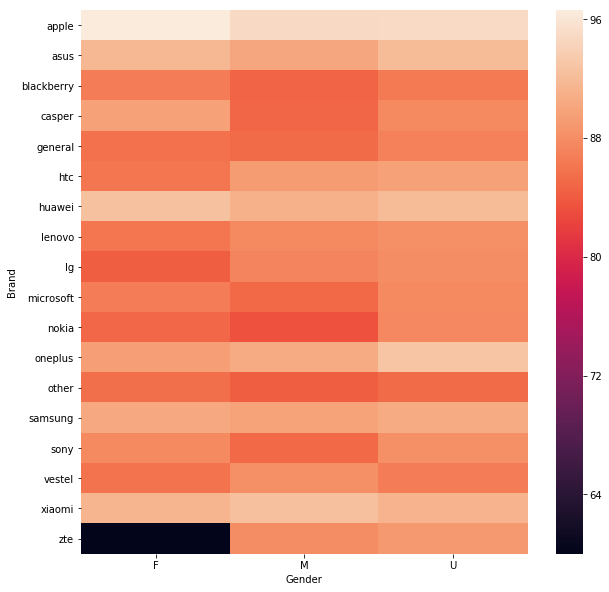

In [19]:
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(pvt)
plt.savefig('heatgenderrating.png')

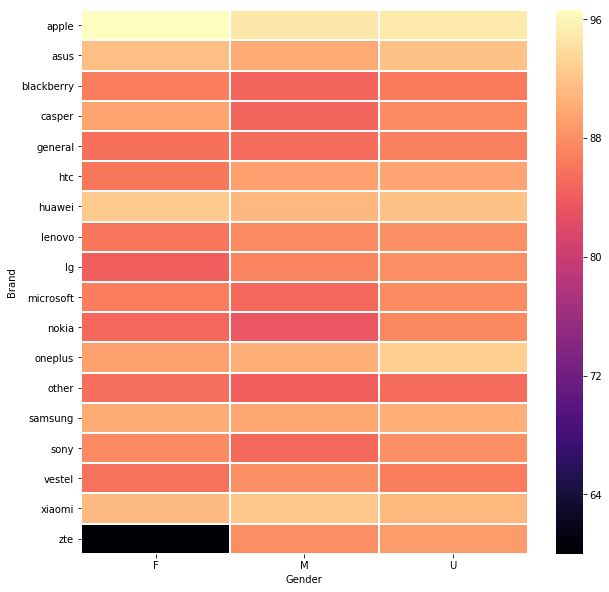

In [20]:
plt.subplots(figsize=(10,10))
sns.heatmap(pvt, cmap='magma', linecolor='white', linewidths=1)
plt.savefig('heatgenderrating2.png')

# Groupby

In [21]:
#df.groupby(['Brand']).first() # last()
df1.groupby(['Brand']).mean() # sum() # std()
gbb = df1.groupby(['Brand'])

In [22]:
df1.groupby(['Brand']).mean()#['Rating'].sort_values(ascending=True).iloc[:10]
#get_group('')

,Age,Rating,p_helpful,n_helpful
Brand,,,,
apple,36.633994,94.937864,7.269309,8.734781
asus,37.977044,90.451128,7.436090,4.275376
blackberry,36.635417,84.833703,42.217295,22.050998
casper,37.705234,85.577465,21.667606,10.347887
general,37.126307,85.340720,28.117452,13.274792
htc,35.983523,88.862602,18.753412,8.845314
huawei,36.654567,91.145359,7.346760,4.411559
lenovo,37.574970,87.769405,7.145441,3.996609
lg,36.593904,86.754258,12.621898,8.196594


In [23]:
gbb.groups

{'apple': Int64Index([ 2558,  2559,  2560,  2561,  2562,  2563,  2564,  2565,  2566,
              2567,
             ...
             44289, 44290, 44291, 44292, 44293, 44294, 44295, 44296, 44297,
             44298],
            dtype='int64', length=6357),
 'asus': Int64Index([ 9480,  9481,  9482,  9483,  9484,  9485,  9486,  9487,  9488,
              9489,
             ...
             29089, 29090, 29091, 29092, 29093, 29094, 29095, 29096, 29097,
             29098],
            dtype='int64', length=1064),
 'blackberry': Int64Index([ 4439,  4440,  4441,  4442,  4443,  4444,  4445,  4446,  4447,
             21563,
             ...
             29629, 29630, 29631, 29632, 29633, 29634, 29635, 29636, 29637,
             29638],
            dtype='int64', length=451),
 'casper': Int64Index([ 1501,  1502,  1503,  1504,  1505,  1506,  1507,  1508,  1509,
              1510,
             ...
             29898, 29899, 29900, 29901, 29902, 29903, 29904, 29905, 29906,
             29907

In [24]:
gbb.groups.keys()

dict_keys(['apple', 'asus', 'blackberry', 'casper', 'general', 'htc', 'huawei', 'lenovo', 'lg', 'microsoft', 'nokia', 'oneplus', 'other', 'samsung', 'sony', 'vestel', 'xiaomi', 'zte'])

In [25]:
gbb.get_group('apple')

,Date,Name,Age,Location,CommentTitle,Comment,Rating,p_helpful,n_helpful,link,Brand,Gender
2558,28.04.2018,yalçın TIRPAN,51.0,SİLİVRİ - İstanbul - Türkiye,Beş Yıldız,Ürün paketleme ve tarafıma ulaşımı hızlı h...,100,0,0,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,M
2559,26.04.2018,Emir Kesim,29.0,- İstanbul - Türkiye,hızlı ve güvenilir alışveriş,Çok hızlı gönderim ve güvenilir alışveriş hizm...,100,0,0,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,M
2560,25.04.2018,Erkek,31.0,-,Uygun fiyat &amp; hızlı kargo,"Apple TR garantili en uygun fiyat, ayrıca heps...",100,0,0,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,M
2561,25.04.2018,Erkek,32.0,MERKEZ - Düzce - Türkiye,Aras Kargo dan vazgeçin,Telefon harika ve hepsiburada siparişi hızlı b...,20,0,0,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,M
2562,25.04.2018,levent satıcı,33.0,NARMAN - Erzurum - Türkiye,İyi gorunuyo simdilik,Kargo gayet hizliydi urunun kapali kutu olup o...,80,0,0,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,M
2563,24.04.2018,Kadın,21.0,-,Yavaş teslimat,Ürün zaten iyi ama elime geçmesi neden 8 gün s...,60,0,0,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,F
2564,24.04.2018,Zeynep Kaya deger,NaN,NaN,Şarj kablosu,Şarj kablomda bir problem var. Şarj etmiyor.,20,0,0,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,F
2565,23.04.2018,BORA BEKİROĞLU,29.0,MENEMEN - İzmir - Türkiye,Bravo,Ürün sağlam bir şekilde geldi,100,0,0,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,M
2566,22.04.2018,NaN,NaN,NaN,Beş Yıldız,"Orijinal ürün, söylenilen tarihte elime ulaştı...",100,0,3,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,NaN
2567,22.04.2018,Akif Özışık,NaN,NaN,Beş Yıldız,Hepsiburadaya teşekkürler. \r\r\r\r\r\r\nFiya...,100,1,1,/apple-iphone-7-32-gb-apple-turkiye-garantili-...,apple,M


In [26]:
gbb[['Rating', 'Age']].get_group('apple').iloc[:10,]

,Rating,Age
2558,100,51.0
2559,100,29.0
2560,100,31.0
2561,20,32.0
2562,80,33.0
2563,60,21.0
2564,20,NaN
2565,100,29.0
2566,100,NaN
2567,100,NaN


In [27]:
#df['Counts'] = df.groupby(['Brand']).transform(len)  
# Didn't Work

In [28]:
df1['Shifted'] = df1.groupby(level=0)['Rating'].shift(1)
df1.head()  
# Didn't Work

,Date,Name,Age,Location,CommentTitle,Comment,Rating,p_helpful,n_helpful,link,Brand,Gender,Shifted
0,12.03.2018,TOLGA ALKAN,28.0,NaN,Güzel Telefon,23.08.2016 da siparişini verdim. 26.08.2016 da...,80,2,5,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,M,NaN
1,15.02.2018,Mehmet Karakoyun,NaN,-,Beş Yıldız,Harika bir telefon 2017yılbaşından birkaçgün ö...,100,3,4,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,M,NaN
2,08.02.2018,Ümit Ertan,28.0,- Ankara - Türkiye,çok kötü,Şimdiye kadar satın aldığım en kalitesiz telef...,20,6,15,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,U,NaN
3,30.01.2018,ismail ÖZKAN,NaN,-,orta,Telefon Guzel 2 eksigi var batarya az gidiyor ...,60,1,3,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,NaN,NaN
4,23.01.2018,Nihal Erkal,NaN,NaN,Biraz iyi baya kötü,Kamerası güzel fiyatı uygun diye aldım ancak t...,40,10,3,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,F,NaN


In [29]:
mask = df1.groupby(level=0).agg('idxmax')
df_count = df1.loc[mask['Age']].reset_index()
df_count
#Didn't Work

c:\users\dogus\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


,index,Date,Name,Age,Location,CommentTitle,Comment,Rating,p_helpful,n_helpful,link,Brand,Gender,Shifted
0,0.0,12.03.2018,TOLGA ALKAN,28.0,NaN,Güzel Telefon,23.08.2016 da siparişini verdim. 26.08.2016 da...,80.0,2.0,5.0,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,M,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,08.02.2018,Ümit Ertan,28.0,- Ankara - Türkiye,çok kötü,Şimdiye kadar satın aldığım en kalitesiz telef...,20.0,6.0,15.0,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,U,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,29.12.2017,Erkek,20.0,- İçel - Türkiye,EKRAN SIKINTILI,TELEFON ON NUMARA 1 YILDIR ELİMDE ANCAK SAĞOLS...,60.0,4.0,2.0,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,M,NaN
8,8.0,14.12.2017,Erkek,30.0,- İstanbul - Türkiye,Beş Yıldız,"İstanbul'a 1 günde kargo ile teslim edildi, ku...",100.0,0.0,1.0,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,M,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data2 = df1.set_index('Brand').groupby(level='Brand').mean().sort_values(by='Rating', ascending=True) #df.groupby(level='Brand')
data2

,Age,Rating,p_helpful,n_helpful,Shifted
Brand,,,,,
nokia,36.879007,83.916968,30.985560,17.296029,NaN
other,38.030405,84.618215,6.995400,4.140754,NaN
blackberry,36.635417,84.833703,42.217295,22.050998,NaN
general,37.126307,85.340720,28.117452,13.274792,NaN
casper,37.705234,85.577465,21.667606,10.347887,NaN
sony,35.935994,85.909910,12.248649,8.212613,NaN
microsoft,37.818792,86.288210,17.965066,7.803493,NaN
lg,36.593904,86.754258,12.621898,8.196594,NaN
zte,37.117647,86.904762,13.750000,8.107143,NaN


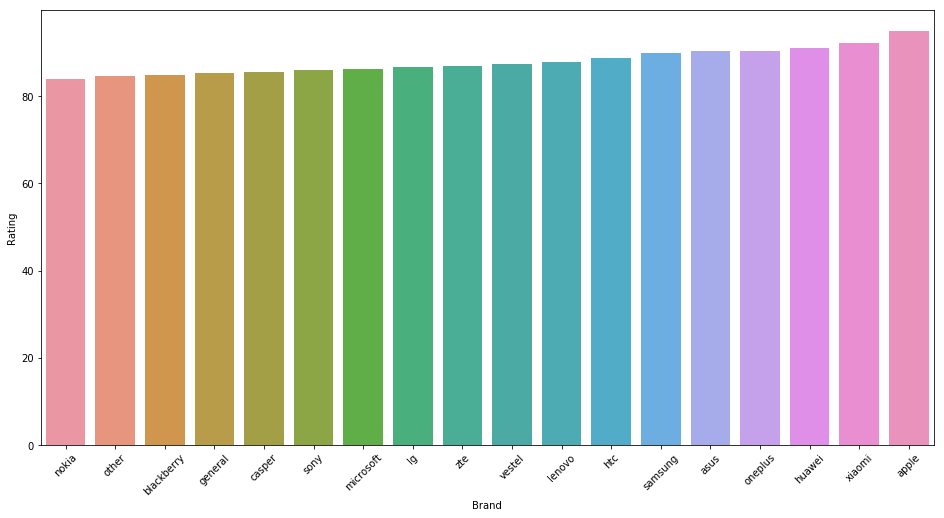

In [31]:
# mean ratings barplot
plt.subplots(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(y='Rating', x=data2.index, data=data2)
plt.savefig('barplot1.png')


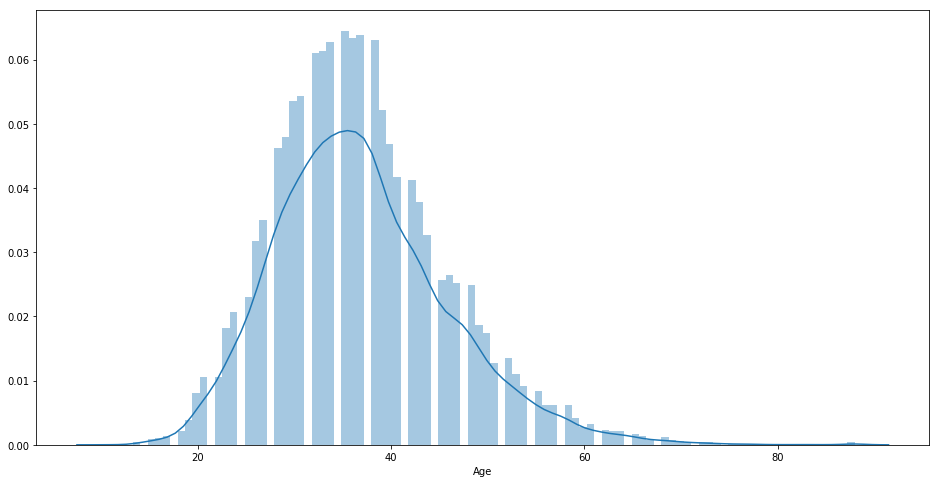

In [32]:
plt.subplots(figsize=(16,8))
sns.distplot(df1['Age'].dropna(), bins=100)
plt.savefig('agedist1.png')

# Brand and Rating

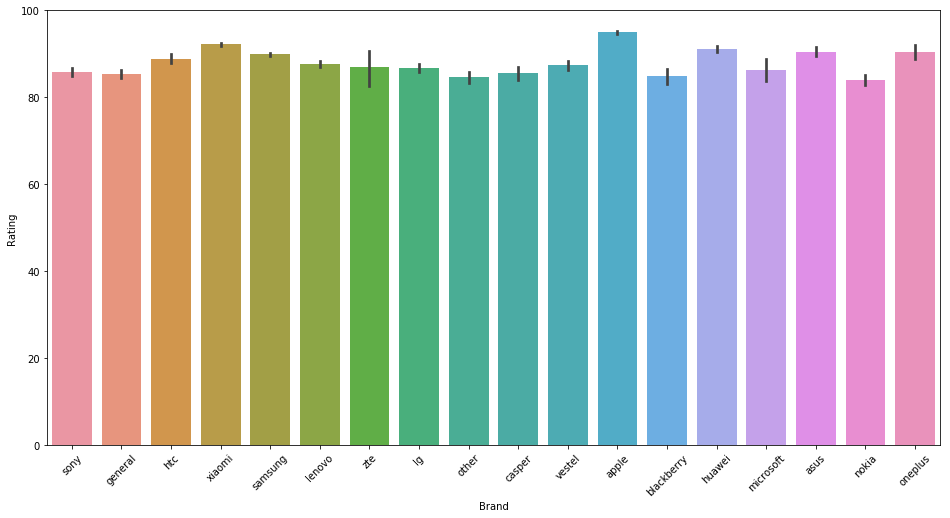

In [33]:
plt.subplots(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x=df1['Brand'], y=df1['Rating'], data=df1)
plt.savefig('barplot1.png')

In [34]:
df1.head()

,Date,Name,Age,Location,CommentTitle,Comment,Rating,p_helpful,n_helpful,link,Brand,Gender,Shifted
0,12.03.2018,TOLGA ALKAN,28.0,NaN,Güzel Telefon,23.08.2016 da siparişini verdim. 26.08.2016 da...,80,2,5,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,M,NaN
1,15.02.2018,Mehmet Karakoyun,NaN,-,Beş Yıldız,Harika bir telefon 2017yılbaşından birkaçgün ö...,100,3,4,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,M,NaN
2,08.02.2018,Ümit Ertan,28.0,- Ankara - Türkiye,çok kötü,Şimdiye kadar satın aldığım en kalitesiz telef...,20,6,15,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,U,NaN
3,30.01.2018,ismail ÖZKAN,NaN,-,orta,Telefon Guzel 2 eksigi var batarya az gidiyor ...,60,1,3,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,NaN,NaN
4,23.01.2018,Nihal Erkal,NaN,NaN,Biraz iyi baya kötü,Kamerası güzel fiyatı uygun diye aldım ancak t...,40,10,3,/sony-xperia-xa-ultra-sony-turkiye-garantili-p...,sony,F,NaN


In [35]:
#plt.subplots(figsize=(16,8))
#sns.pairplot(df1.drop( 'Shifted', axis=1), hue='Gender', palette='rainbow')
#plt.savefig('pairplot1.png')

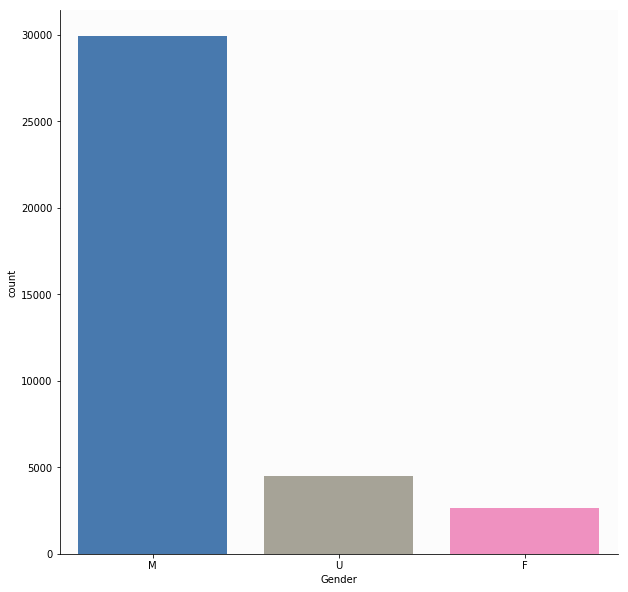

In [36]:
#http://seaborn.pydata.org/tutorial/color_palettes.html
plt.subplots(figsize=(10,10))
sns.countplot(df1['Gender'].dropna(axis=0), palette=sns.xkcd_palette(['windows blue', 'greyish', 'pink']))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor((0.99,0.99,0.99))
plt.savefig('genderplot1.png')

## AGE GROUPS

In [37]:
"""
12–17
18–24
25–34
35–44
45–54
55–64
65+
"""

'\n12–17\n18–24\n25–34\n35–44\n45–54\n55–64\n65+\n'

In [38]:
df2 = df1.copy()
del df2['Shifted']
dage = df2[pd.notnull(df['Age'])]  # 27402 rows

In [39]:
def age_segmentor(x):
    if x in range(12,18):
        segment = '12-17'
    elif x in range(18,25):
        segment = '18–24'
    elif x in range(25,35):
        segment = '25–34'
    elif x in range(35,45):
        segment = '35–44'
    elif x in range(45,55):
        segment = '45–54'
    elif x in range(55,65):
        segment = '55–64'        
    elif x in range(65,90):
        segment = '65+'
    else:
        segment = np.nan
    return segment
dage['Age_Segment'] = dage.loc[:,'Age'].apply(age_segmentor)
dage = dage[(pd.notnull(dage['Age'])) & (pd.notnull(dage['Age_Segment']))]  # 27401 rows

c:\users\dogus\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


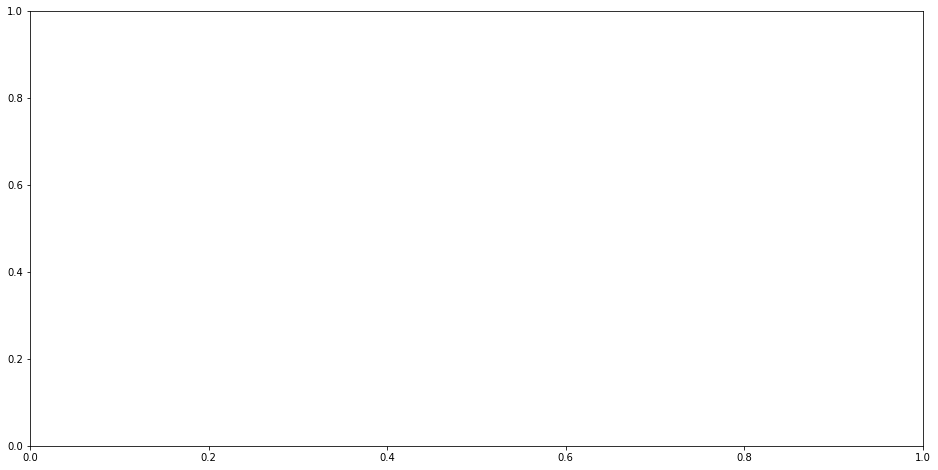

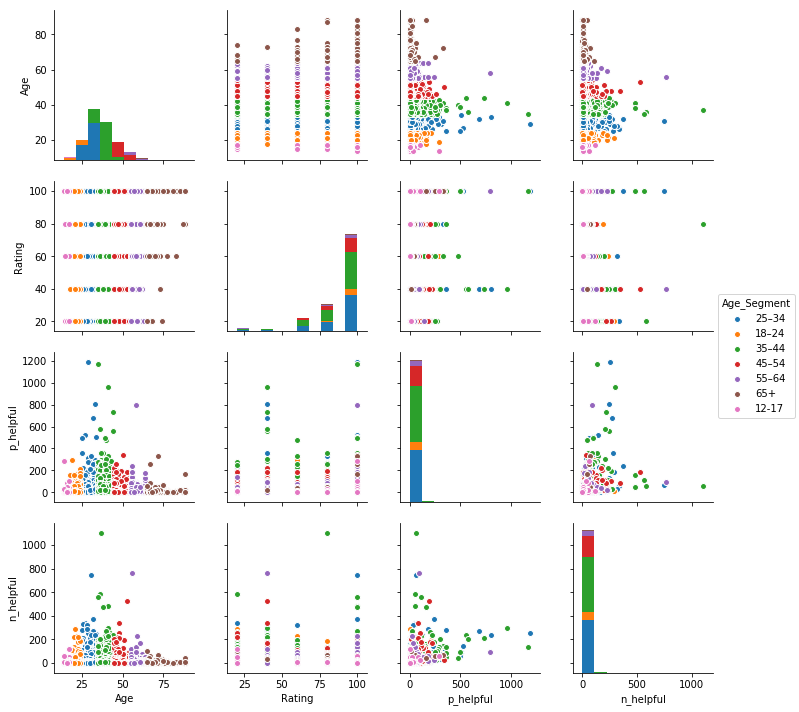

In [40]:
plt.subplots(figsize=(16,8))
sns.pairplot(dage, hue='Age_Segment')

In [41]:
page = dage.pivot_table(index='Brand', columns='Age_Segment', values='Rating', aggfunc=np.mean)

In [42]:
page.stack('Age_Segment')

Brand       Age_Segment
apple       12-17           71.428571
            18–24           95.183673
            25–34           94.918778
            35–44           94.921348
            45–54           95.347092
            55–64           95.104895
            65+             94.117647
asus        12-17          100.000000
            18–24           92.972973
            25–34           90.950226
            35–44           88.979592
            45–54           92.452830
            55–64           90.303030
            65+             84.000000
blackberry  12-17          100.000000
            18–24           87.368421
            25–34           85.548387
            35–44           81.103448
            45–54           86.122449
            55–64           88.888889
            65+             90.000000
casper      18–24           82.352941
            25–34           84.480000
            35–44           84.594595
            45–54           88.571429
            55–64         

In [43]:
gage=page.groupby('Brand')
gapple = gage.get_group('apple')
gapple

Age_Segment,12-17,18–24,25–34,35–44,45–54,55–64,65+
Brand,,,,,,,
apple,71.428571,95.183673,94.918778,94.921348,95.347092,95.104895,94.117647


In [44]:
page.loc[['apple','samsung','xiaomi','sony'],:]

Age_Segment,12-17,18–24,25–34,35–44,45–54,55–64,65+
Brand,,,,,,,
apple,71.428571,95.183673,94.918778,94.921348,95.347092,95.104895,94.117647
samsung,90.400000,90.878187,90.316887,89.377093,90.977011,88.768116,90.000000
xiaomi,96.923077,93.380282,92.674271,92.326365,91.594203,90.947368,93.750000
sony,100.000000,85.794393,85.403377,85.695067,88.290155,86.666667,93.333333


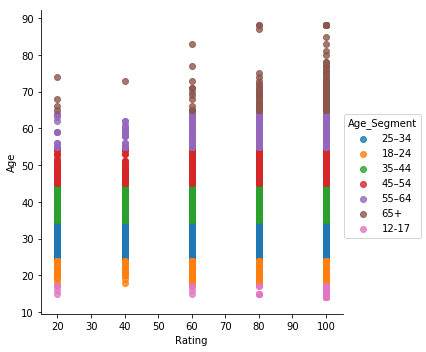

In [45]:
sns.lmplot(data=dage, x='Rating', y='Age', hue='Age_Segment', fit_reg=False)


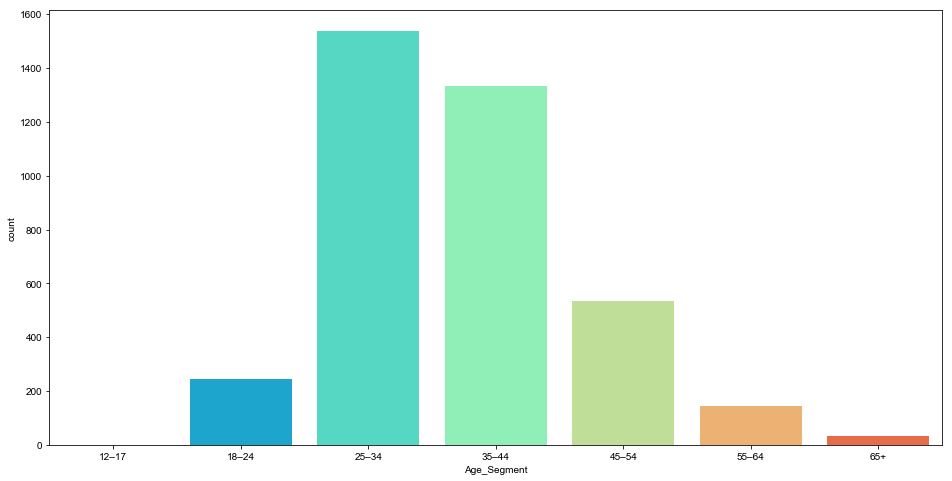

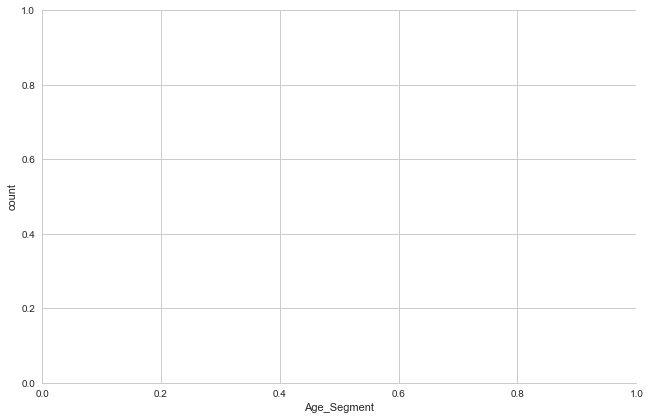

In [46]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.factorplot(x="Age_Segment", data=dage[dage['Brand']=='apple'], kind="count",
                   palette="rainbow", size=6, aspect=1.5,
                   order=["12–17","18–24","25–34","35–44","45–54","55–64","65+"],
              ax=ax)
fig.set_size_inches(16,8)
"""plt.title('Apple')
plt.xlabel('Age Segment')
plt.ylabel('Frequency')
"""

fig.savefig('Apple_AS1')

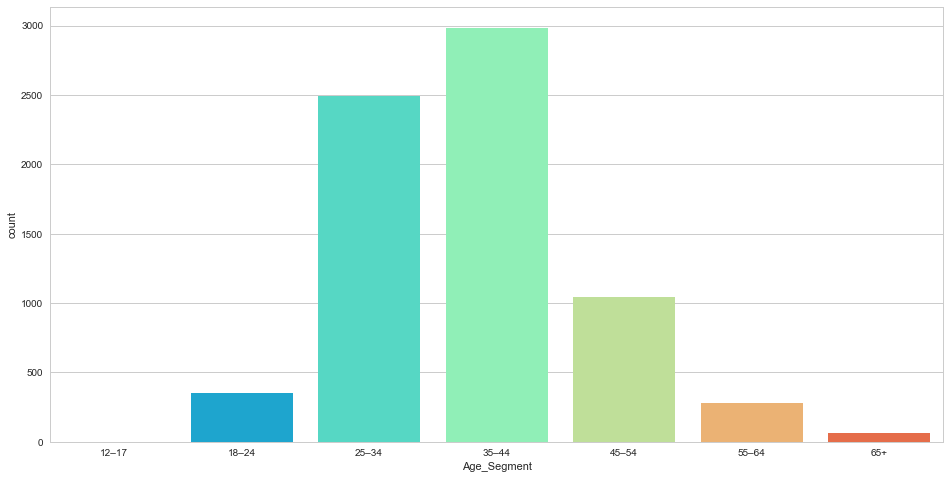

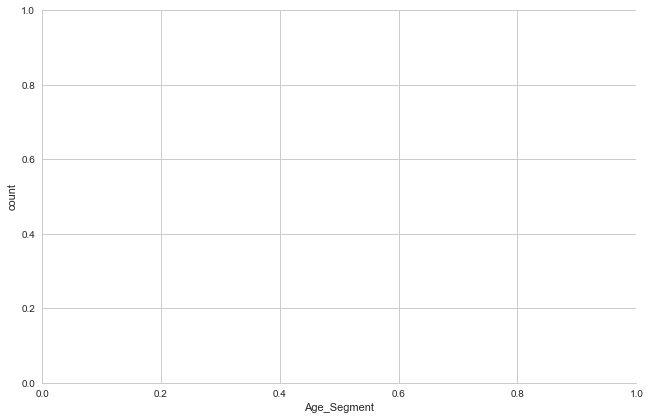

In [47]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.factorplot(x="Age_Segment", data=dage[dage['Brand']=='samsung'], kind="count",
                   palette="rainbow", size=6, aspect=1.5,
                   order=["12–17","18–24","25–34","35–44","45–54","55–64","65+"],
              ax=ax)
fig.set_size_inches(16,8)
fig.savefig('Samsung_AS1')

Text(0.5,1,'Other')

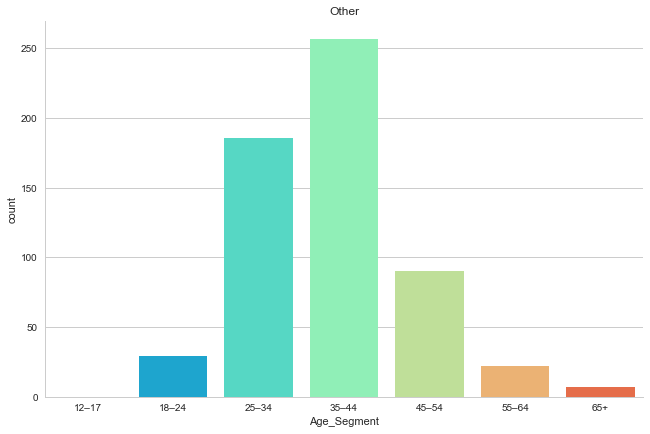

In [48]:
g = sns.factorplot(x="Age_Segment", data=dage[dage['Brand']=='other'], kind="count",
                   palette="rainbow", size=6, aspect=1.5,
                   order=["12–17","18–24","25–34","35–44","45–54","55–64","65+"])
plt.title('Other')

c:\users\dogus\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


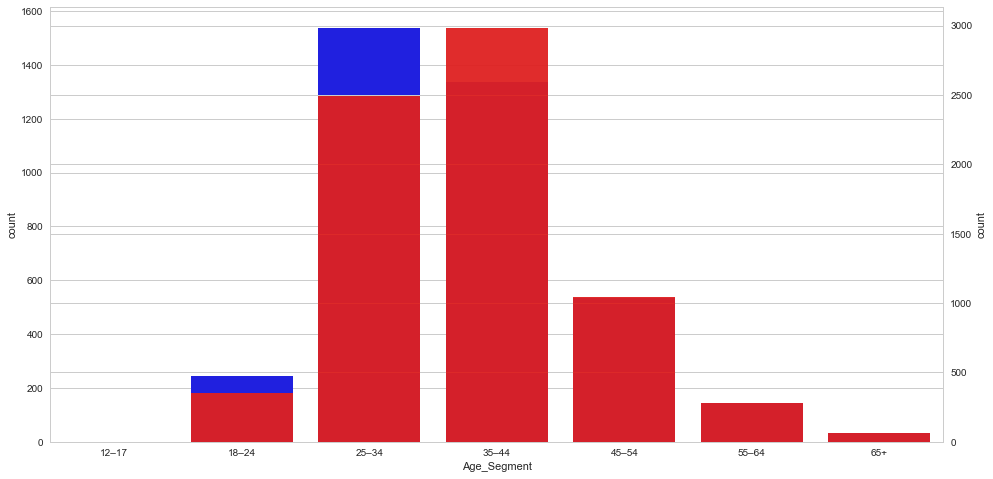

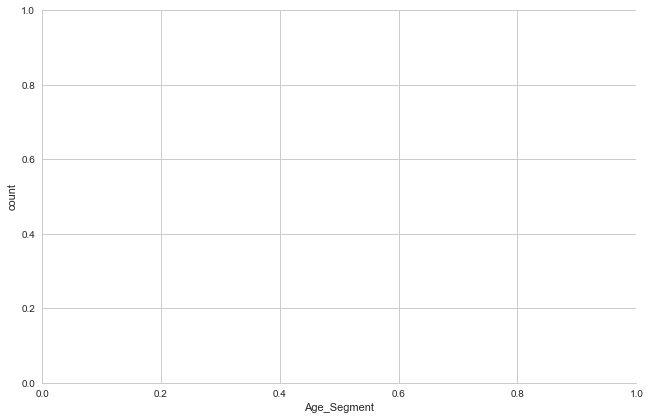

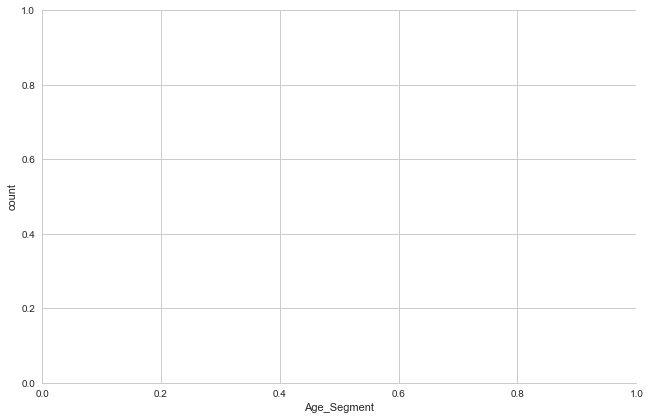

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
sns.factorplot(x="Age_Segment", data=dage[dage['Brand']=='apple'], kind="count",
                   color="blue", size=6, aspect=1.5,
                   order=["12–17","18–24","25–34","35–44","45–54","55–64","65+"],
              ax=ax)

ax2 = ax.twinx()
sns.factorplot(x="Age_Segment", data=dage[dage['Brand']=='samsung'], kind="count",
                   color="red", size=6, aspect=1.5,
                   order=["12–17","18–24","25–34","35–44","45–54","55–64","65+"],
              ax=ax2,alpha=0.95)
"""plt.tifig, ax = plt.subplots(figsize=(16,8))
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['left'].set_visible(False)
fig.gca().spines['right'].set_visible(False)
fig.gca().set_facecolor((0.99,0.99,0.99))"""
sns.despine()

fig.show()
# leave that for now, maybe seaborn isn't well suited for overlaying

In [50]:
"""grid = sns.FacetGrid(data=dage, col='Brand',
                     hue='Age_Segment', col_wrap=5,size=3)

grid.map(plt.axhline, y=0, ls=":", c=".5")

grid.map(sns.stripplot, 'Age','Rating')

# That doesn't work because they have common frequency base,
  #which makes the graphs affect each others' ratios.
"""

'grid = sns.FacetGrid(data=dage, col=\'Brand\',\n                     hue=\'Age_Segment\', col_wrap=5,size=3)\n\ngrid.map(plt.axhline, y=0, ls=":", c=".5")\n\ngrid.map(sns.stripplot, \'Age\',\'Rating\')\n\n# That doesn\'t work because they have common frequency base,\n  #which makes the graphs affect each others\' ratios.\n'

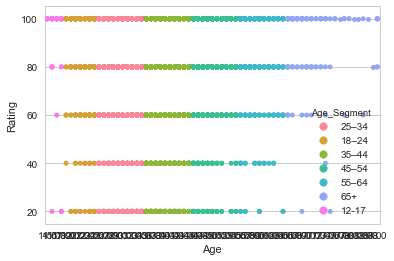

In [51]:
sns.stripplot(x='Age',y='Rating',data=dage.dropna(axis=0), hue='Age_Segment')

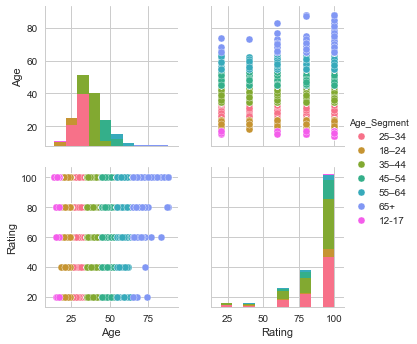

In [52]:
DF = dage.loc[:,['Age','Age_Segment','Brand','Rating']]
sns.pairplot(DF, hue='Age_Segment')